In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [2]:
data = pd.read_csv('diabetes.csv')

data.info()
print("row one of dataset:\n",data.head(1))

# Display basic statistics of the dataset
print("Basic Statistics of the Dataset:")
print(data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
row one of dataset:
    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   

In [3]:
# Separate features (X) and target variable (y)
X = data.drop(columns=['Outcome'])  # Assuming 'Outcome' is the target variable
y = data['Outcome']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,  random_state=104,  test_size=0.3,  shuffle=True) 

# Print out train and test sets
print('X_train row zero: ') 
print(X_train.head(0)) 
print('') 
print('X_test row zero: ') 
print(X_test.head(0)) 
print('') 
print('y_train row zero: ') 
print(y_train.head(0)) 
print('') 
print('y_test row zero: ') 
print(y_test.head(0))

#there is no null value but there is some zerro value that must considet!
#y_train = y_train[X_train.index]  #Adjust y_train accordingly after dropping rows
# Count zero values in the 'SkinThickness' column in the training dataset
zero_skinthickness_count = (X_train['SkinThickness'] == 0).sum()
print("\nNumber of zero values in the 'SkinThickness' column in the training dataset:", zero_skinthickness_count)

# Count zero values in the 'Glucose' column in the training dataset
glucose_zeros_count = (X_train['Glucose'] == 0).sum()
print("Number of zero values in the 'Glucose' column in the training dataset:", glucose_zeros_count)

# Count zero values in the 'BMI' column in the training dataset
zero_bmi_count = (X_train['BMI'] == 0).sum()
print("Number of zero values in the 'BMI' column in the training dataset:", zero_bmi_count)

# Count zero values in the 'BloodPressure' column in the training dataset
zero_bmi_count = (X_train['BloodPressure'] == 0).sum()
print("Number of zero values in the 'BloodPressure' column in the training dataset:", zero_bmi_count)

# the zero value left untouched but it will fill with the mean for each feature and considering the outcome value for those



X_train row zero: 
Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age]
Index: []

X_test row zero: 
Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age]
Index: []

y_train row zero: 
Series([], Name: Outcome, dtype: int64)

y_test row zero: 
Series([], Name: Outcome, dtype: int64)

Number of zero values in the 'SkinThickness' column in the training dataset: 168
Number of zero values in the 'Glucose' column in the training dataset: 3
Number of zero values in the 'BMI' column in the training dataset: 6
Number of zero values in the 'BloodPressure' column in the training dataset: 20


In [4]:
# Create a DataFrame with X_train and y_train (The pandas. concat() function concatenates and combines multiple DataFrames or Series into a single, unified DataFrame or Series.)
train_data = pd.concat([X_train, y_train], axis=1)

# Calculate the mean of each feature for outcome 0 and outcome 1
mean_outcome_0 = train_data[train_data['Outcome'] == 0].mean()
mean_outcome_1 = train_data[train_data['Outcome'] == 1].mean()

# Fill missing values for 'BMI', 'Glucose', and 'BloodPressure' based on the mean of each feature for the respective outcome groups
for feature in ['BMI', 'Glucose', 'BloodPressure' , 'SkinThickness']:
    # Fill missing values for outcome 0
    X_train.loc[(X_train[feature] == 0) & (y_train == 0), feature] = mean_outcome_0[feature].astype('int64')
    # Fill missing values for outcome 1
    X_train.loc[(X_train[feature] == 0) & (y_train == 1), feature] = mean_outcome_1[feature].astype('int64')

# Print the updated X_train with filled missing values
print("X_train with filled missing values:")
print(X_train.head(10))


X_train with filled missing values:
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
387            8      105            100             36        0  43.3   
58             0      146             82             19        0  40.5   
692            2      121             70             32       95  39.1   
637            2       94             76             18       66  31.6   
435            0      141             72             21        0  42.4   
727            0      141             84             26        0  32.4   
218            5       85             74             22        0  29.0   
612            7      168             88             42      321  38.2   
453            2      119             68             19        0  19.6   
725            4      112             78             40        0  39.4   

     DiabetesPedigreeFunction  Age  
387                     0.239   45  
58                      1.781   44  
692                     0.886   23  
6

analyze the distribution of features correlations

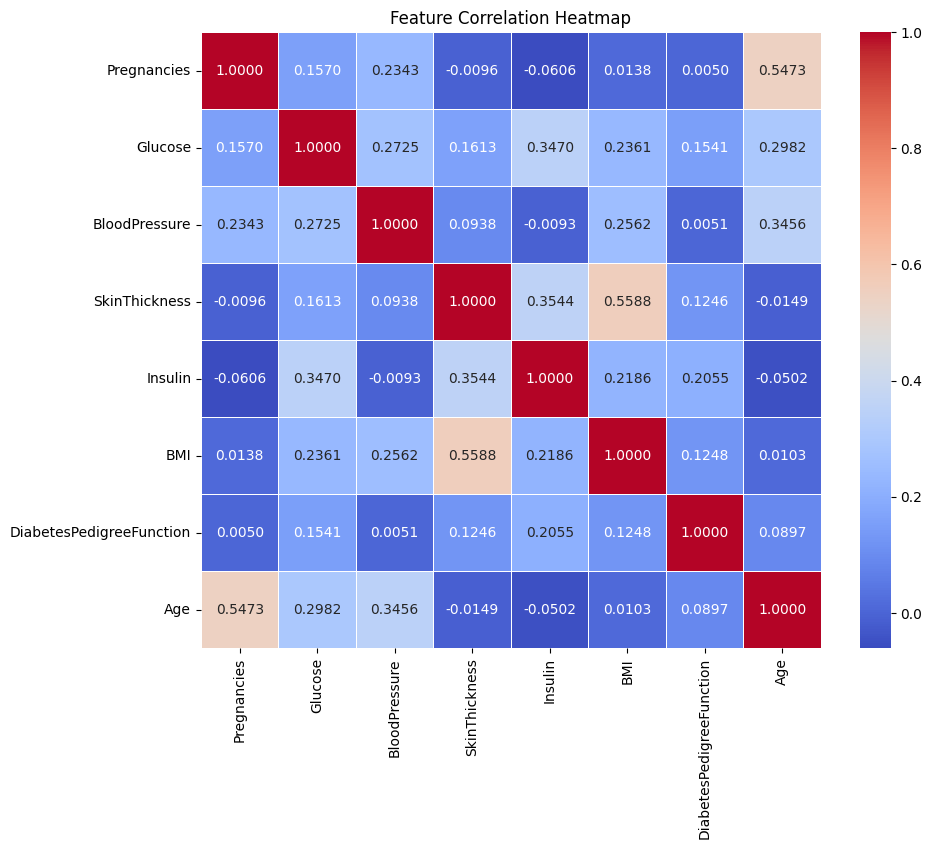

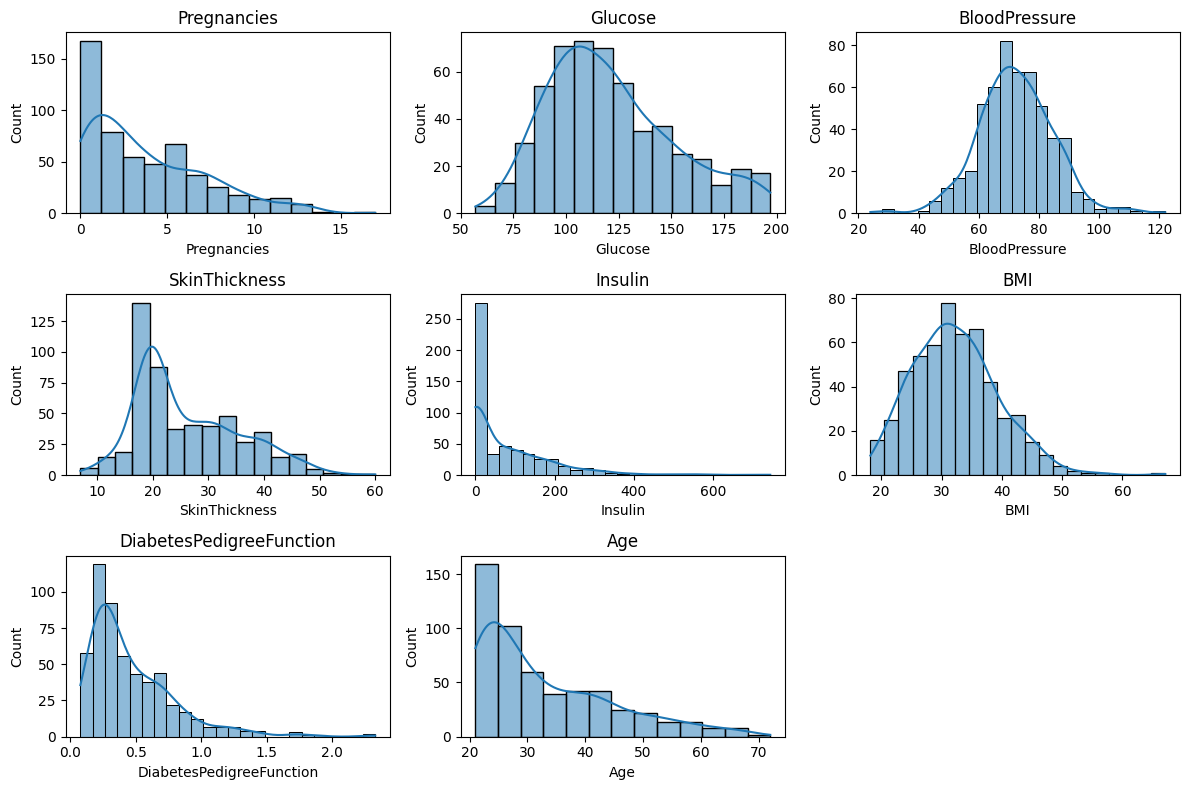

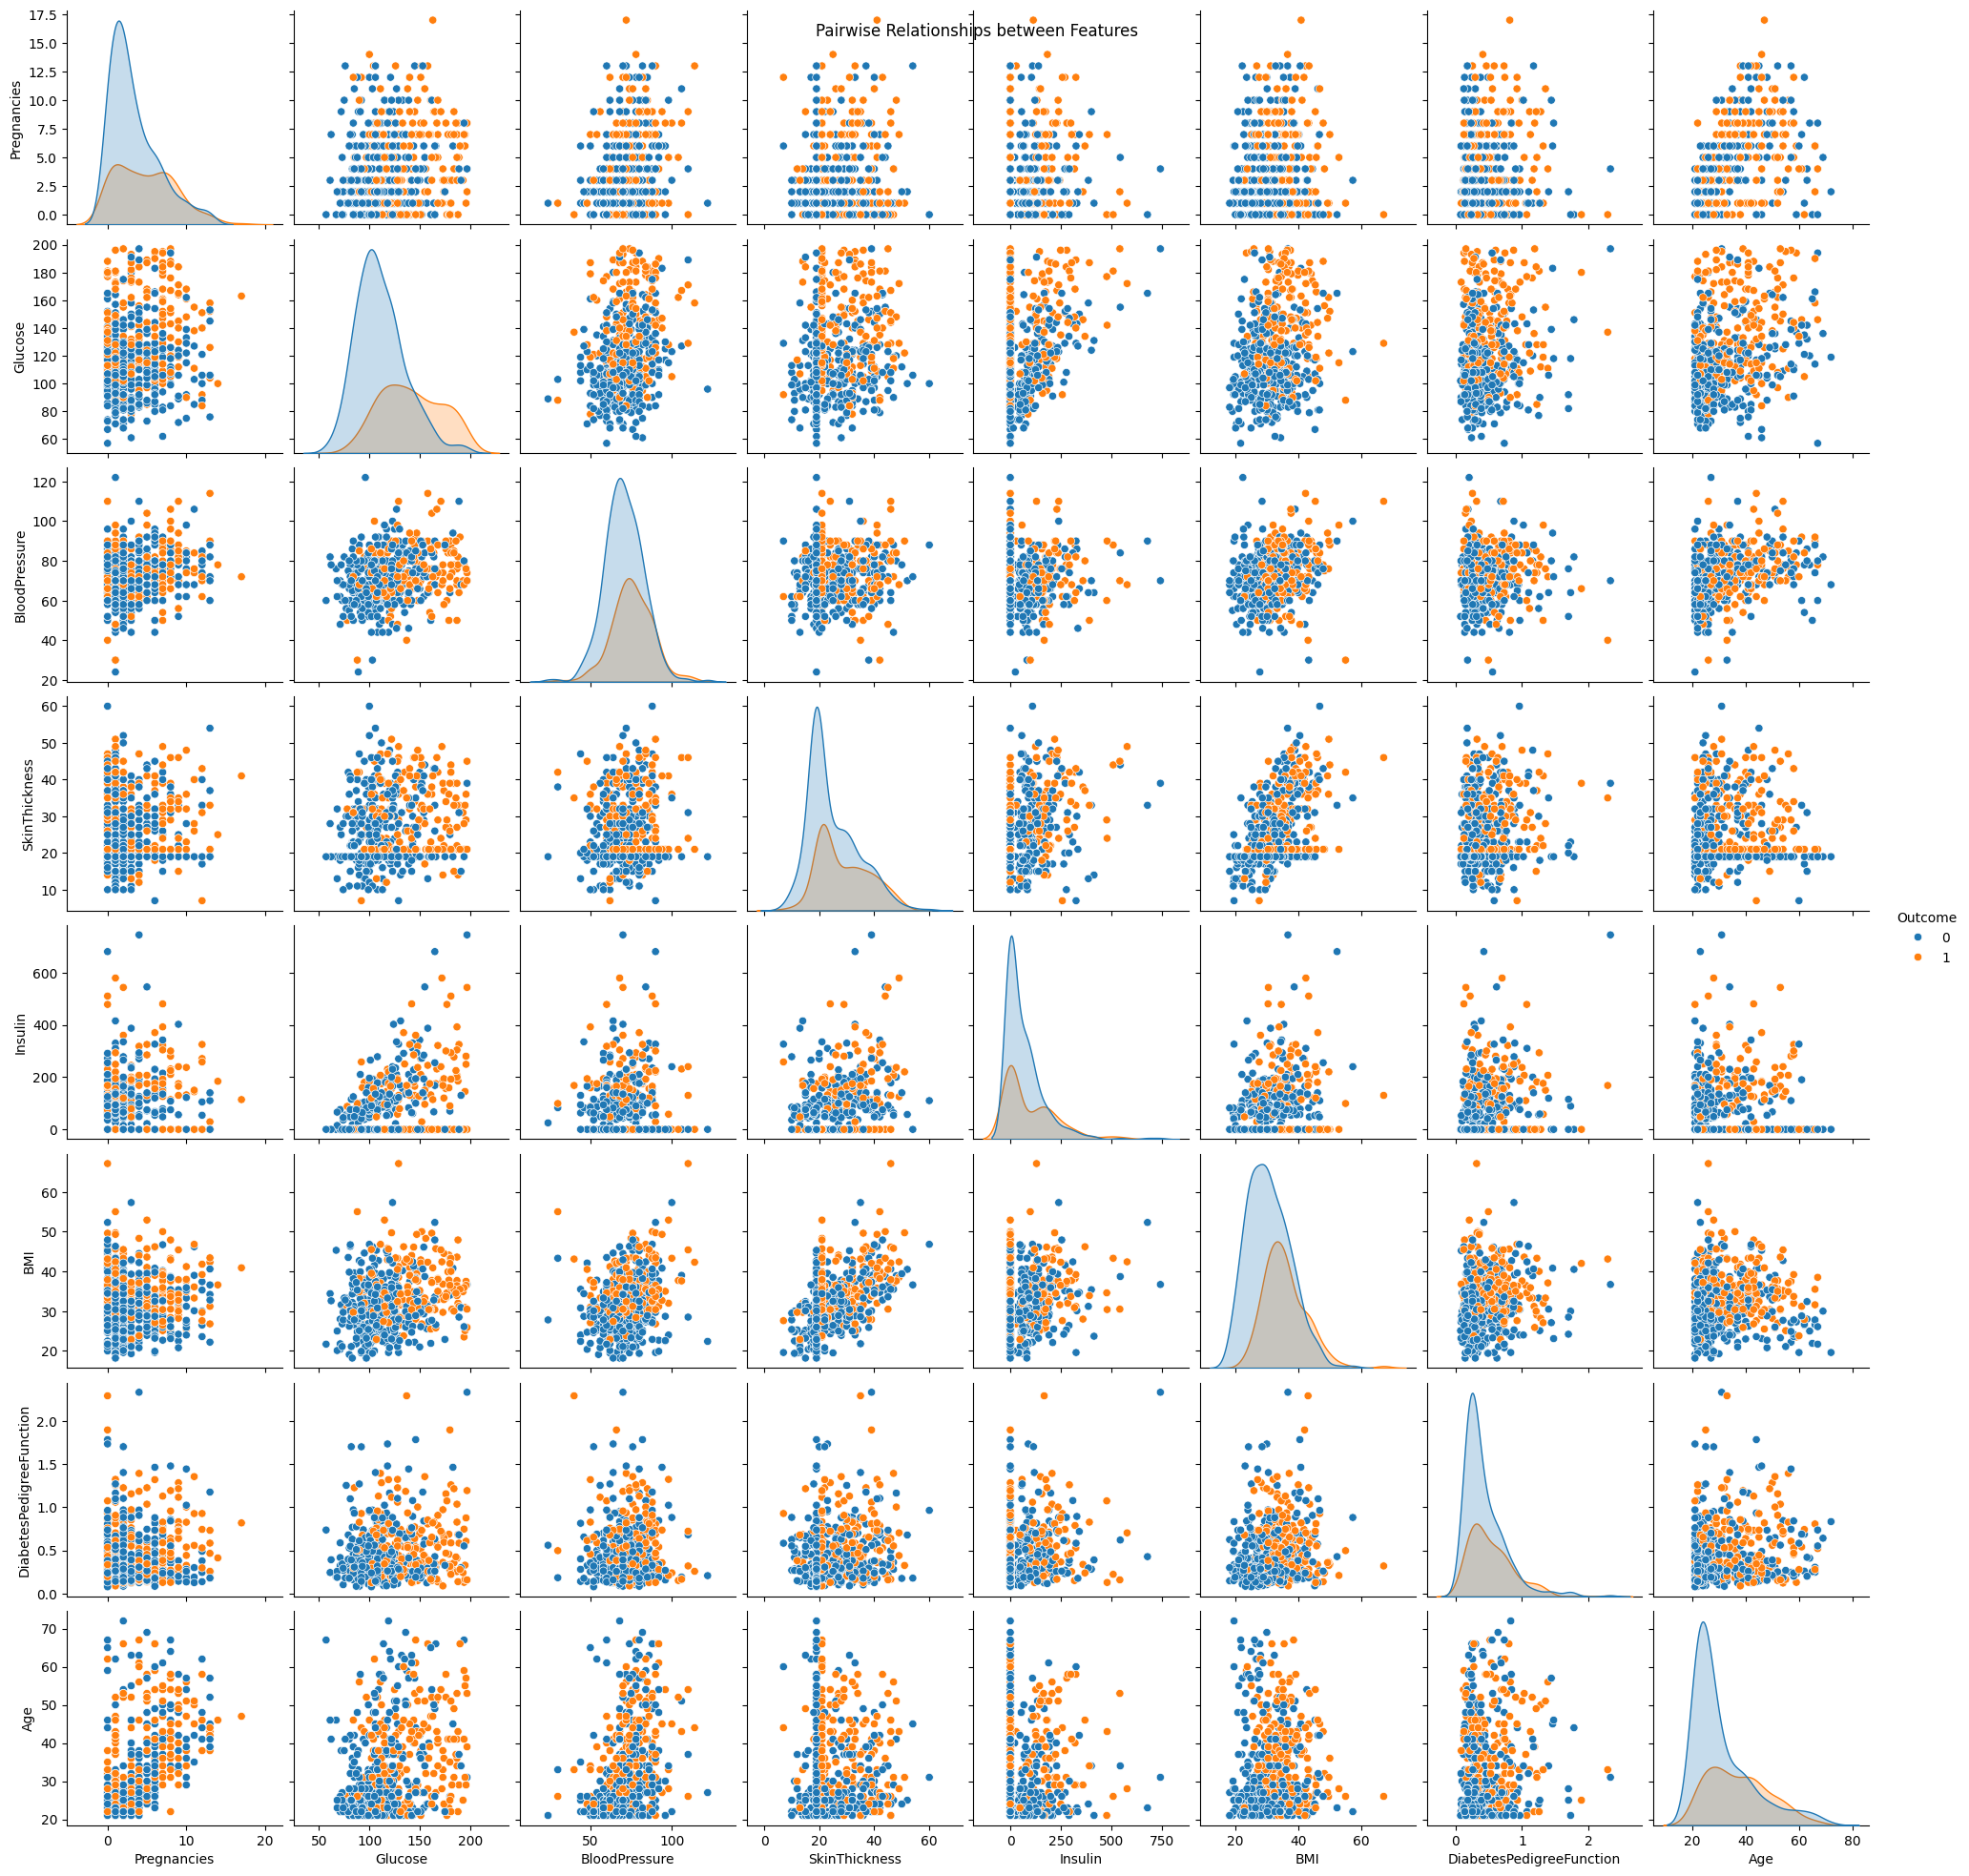

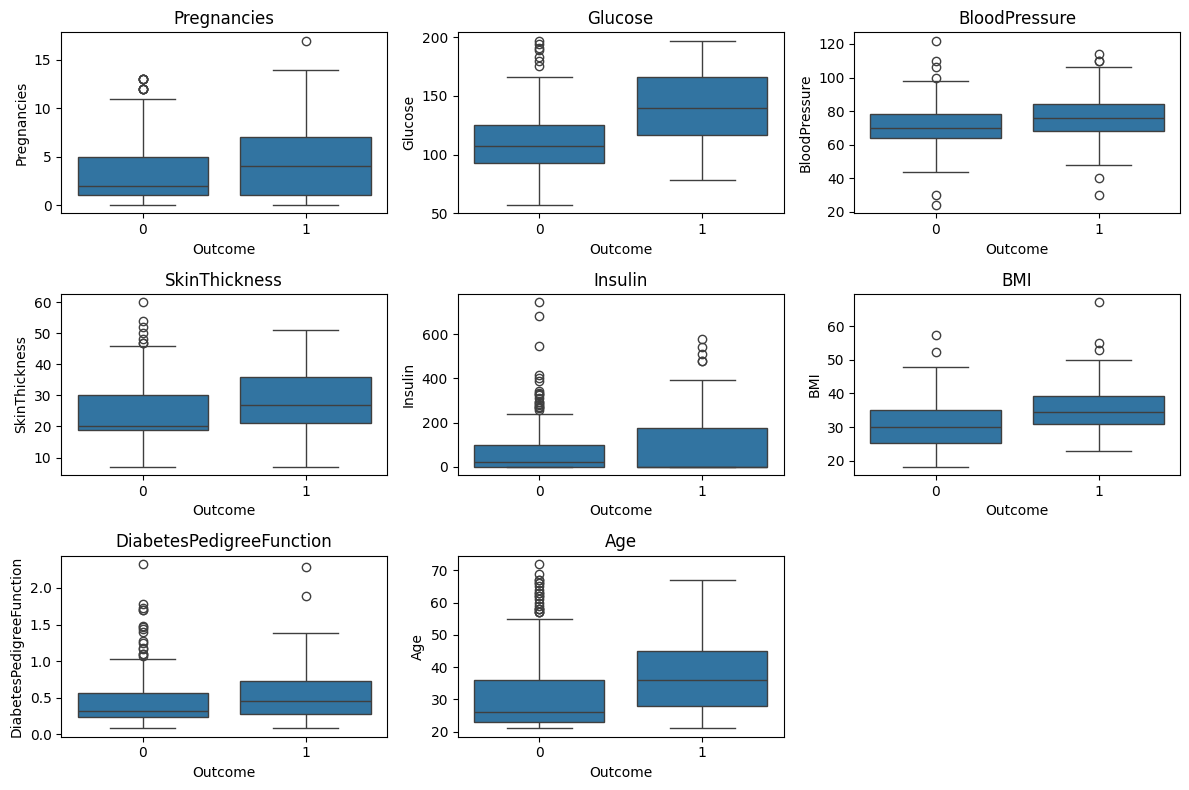

In [5]:
# Compute the correlation matrix for X_train
correlation_matrix = X_train.corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".4f", linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()

# Visualize the distribution of each feature in X_train
plt.figure(figsize=(12, 8))
for i, column in enumerate(X_train.columns):
    plt.subplot(3, 3, i+1)
    sns.histplot(X_train[column], kde=True)
    plt.title(column)
plt.tight_layout()
plt.show()

# Visualize pairwise relationships between features in X_train
train_data = pd.concat([X_train, y_train], axis=1)
sns.pairplot(train_data, hue= 'Outcome' )
plt.suptitle("Pairwise Relationships between Features")
plt.show()

# Visualize boxplots to identify outliers in X_train
plt.figure(figsize=(12, 8))
for i, column in enumerate(X_train.columns):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x=y, y=X_train[column])
    plt.title(column)
plt.tight_layout()
plt.show()

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


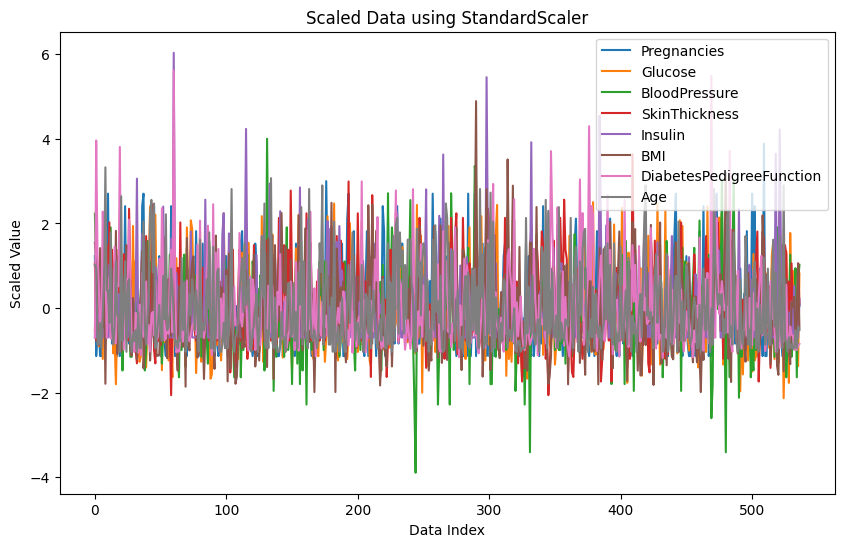

In [6]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
#scaling and standardizing the data is a necceseties !
X_train_scaled = StandardScaler()
X_train_scaled.fit_transform(X_train)

X_test_scaled = StandardScaler()
X_test_scaled.fit_transform(X_test)

print(data.head())

# Assuming 'scaled_data' is your scaled numpy array
# Let's say it contains scaled values of 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', and 'Age'

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

# Assuming 'X_train' is your training data
# X_train = ...

# Assuming you want to scale certain columns
columns_to_scale = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the selected columns
X_train_scaled = scaler.fit_transform(X_train[columns_to_scale])

# Create a DataFrame with the scaled values (optional)
scaled_df = pd.DataFrame(X_train_scaled, columns=columns_to_scale)

# Plot the scaled data
plt.figure(figsize=(10, 6))
plt.plot(X_train_scaled)
plt.xlabel('Data Index')
plt.ylabel('Scaled Value')
plt.title('Scaled Data using StandardScaler')
plt.legend(columns_to_scale)
plt.show()



In [11]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Support Vector Machine (SVM) model
svm_model = SVC(C=1, kernel='rbf', gamma='auto')
svm_model.fit(X_train_scaled, y_train)

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100000, max_depth=1000, criterion='entropy',
                                  min_samples_split=2, random_state=42, bootstrap=True,
                                  max_features=5)
rf_model.fit(X_train_scaled, y_train)

# Train Logistic Regression model with increased max_iter
lr_model = LogisticRegression(max_iter=1000, solver='lbfgs')
lr_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
svm_test_pred = svm_model.predict(X_test_scaled)
rf_test_pred = rf_model.predict(X_test_scaled)
lr_test_pred = lr_model.predict(X_test_scaled)

# Evaluate the models on the test set
svm_test_accuracy = accuracy_score(y_test, svm_test_pred)
rf_test_accuracy = accuracy_score(y_test, rf_test_pred)
lr_test_accuracy = accuracy_score(y_test, lr_test_pred)

print("Test Set Accuracy:")
print("Support Vector Machine (SVM) Accuracy:", svm_test_accuracy)
print("Random Forest Accuracy:", rf_test_accuracy)
print("Logistic Regression Accuracy:", lr_test_accuracy)


Test Set Accuracy:
Support Vector Machine (SVM) Accuracy: 0.7337662337662337
Random Forest Accuracy: 0.7597402597402597
Logistic Regression Accuracy: 0.7532467532467533


from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

 #Selecting specific features
#selected_features = ['BMI', 'Age', 'Glucose', 'BloodPressure','DiabetesPedigreeFunction']
#X_train_selected = X_train_scaled[selected_features]
#X_test_selected = X_test_scaled[selected_features]

# Train Support Vector Machine (SVM) model
svm_model = SVC(C= 10000, kernel= 'poly',gamma='scale')
svm_model.fit(X_train_scaled, y_train)

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=1000, max_depth=100,criterion= 'entropy',
        min_samples_split=6, random_state=42, bootstrap= True,
        max_features=4
        )
rf_model.fit(X_train_scaled, y_train)

# Train Logistic Regression model with increased max_iter
lr_model = LogisticRegression(max_iter=1000, solver='lbfgs')
lr_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
svm_test_pred = svm_model.predict(X_test_scaled)
rf_test_pred = rf_model.predict(X_test_scaled)
lr_test_pred = lr_model.predict(X_test_scaled)

# Evaluate the models on the test set
svm_test_accuracy = accuracy_score(y_test, svm_test_pred)
rf_test_accuracy = accuracy_score(y_test, rf_test_pred)
lr_test_accuracy = accuracy_score(y_test, lr_test_pred)

print("Test Set Accuracy:")
print("Support Vector Machine (SVM) Accuracy:", svm_test_accuracy)
print("Random Forest Accuracy:", rf_test_accuracy)
print("Logistic Regression Accuracy:", lr_test_accuracy)


In [9]:
from sklearn.metrics import classification_report

# Evaluate the models on the test set
print("Test Set Evaluation:")
print("Support Vector Machine (SVM):")
print(classification_report(y_test, svm_test_pred))

print("Random Forest:")
print(classification_report(y_test, rf_test_pred))

print("Logistic Regression:")
print(classification_report(y_test, lr_test_pred))




Test Set Evaluation:
Support Vector Machine (SVM):
              precision    recall  f1-score   support

           0       0.75      0.80      0.77        99
           1       0.59      0.53      0.56        55

    accuracy                           0.70       154
   macro avg       0.67      0.66      0.67       154
weighted avg       0.70      0.70      0.70       154

Random Forest:
              precision    recall  f1-score   support

           0       0.82      0.79      0.80        99
           1       0.64      0.69      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.74       154
weighted avg       0.76      0.75      0.76       154

Logistic Regression:
              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.

In [ ]:
# Train Support Vector Machine (SVM) model
selected_features_ex = ['BMIPlusGlucose','GlucosePlusSkinThickness','GlucosePlusAge','BMIPlusBloodPressure','BMIPlusAge']
X_train_ex_selected = X_train_ex[selected_features_ex]
X_test_ex_selected = X_test_ex[selected_features_ex]

# Train Support Vector Machine (SVM) model
svm_model = SVC(C= 10, kernel= 'rbf',gamma='scale')
svm_model.fit(X_train_ex_selected, y_train)


# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=1000, max_depth=100, criterion='entropy',
                                  min_samples_split=2, random_state=42, bootstrap=True,
                                  max_features=32)
rf_model.fit(X_train_ex_selected, y_train)

# Train Logistic Regression model with increased max_iter
lr_model = LogisticRegression(max_iter=10000, solver='lbfgs')
lr_model.fit(X_train_ex_selected, y_train)
# Test Support Vector Machine (SVM) model
svm_test_pred = svm_model.predict(X_test_ex_selected )

# Test Random Forest model
rf_test_pred = rf_model.predict(X_test_ex_selected )

# Test Logistic Regression model
lr_test_pred = lr_model.predict(X_test_ex_selected )





In [ ]:
from sklearn.metrics import accuracy_score

# Compute accuracy score for each model
svm_test_accuracy = accuracy_score(y_test, svm_test_pred)
rf_test_accuracy = accuracy_score(y_test, rf_test_pred)
lr_test_accuracy = accuracy_score(y_test, lr_test_pred)

print("Test Set Accuracy:")
print("Support Vector Machine (SVM) Accuracy:", svm_test_accuracy)
print("Random Forest Accuracy:", rf_test_accuracy)
print("Logistic Regression Accuracy:", lr_test_accuracy)

# Evaluate the models on the test set
print("Test Set Evaluation:")
print("Support Vector Machine (SVM):")
print(classification_report(y_test, svm_test_pred))

print("Random Forest:")
print(classification_report(y_test, rf_test_pred))

print("Logistic Regression:")
print(classification_report(y_test, lr_test_pred))

